In [1]:
import os
os.chdir('../data/arma_generated/sample/')

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
df = pd.read_csv('./3.csv')
df.objects = df.objects.apply(lambda lst: [(x,y) for _,x,y in eval(lst)])
df

,timestamp,frame,objects
0,2018-11-24 11:16:08,2,"[(731.522, -428.91), (603.822, -536.915), (610..."
1,2018-11-24 11:16:08,3,"[(731.686, -428.993), (605.739, -538.424), (61..."
2,2018-11-24 11:16:08,11,"[(731.844, -429.057), (608.146, -538.702), (61..."
3,2018-11-24 11:16:08,19,"[(731.522, -428.91), (603.822, -536.915), (610..."
4,2018-11-24 11:16:08,30,"[(731.686, -428.993), (605.739, -538.424), (61..."
5,2018-11-24 11:16:08,42,"[(731.844, -429.057), (608.146, -538.702), (61..."
6,2018-11-24 11:16:08,44,"[(731.844, -429.057), (608.146, -538.702), (61..."
7,2018-11-24 11:16:09,1,"[(730.686, -428.575), (602.246, -529.189), (61..."
8,2018-11-24 11:16:09,2,"[(731.022, -428.681), (601.607, -531.684), (61..."
9,2018-11-24 11:16:09,3,"[(730.686, -428.575), (601.811, -530.304), (61..."


In [7]:
start_time = df['timestamp'].min()
start_time

'2018-11-24 11:16:08'

In [8]:
df.objects.str.len().unique()

array([5])

In [9]:
def is_bbox_in_scope(x, y):
    return 0 <= x <= 1280 and 0 <=  y <= 720

In [10]:
df.objects = df.objects.apply(lambda bboxes: [bbox for bbox in bboxes if is_bbox_in_scope(*bbox)])
df

,timestamp,frame,objects
0,2018-11-24 11:16:08,2,[]
1,2018-11-24 11:16:08,3,[]
2,2018-11-24 11:16:08,11,[]
3,2018-11-24 11:16:08,19,[]
4,2018-11-24 11:16:08,30,[]
5,2018-11-24 11:16:08,42,[]
6,2018-11-24 11:16:08,44,[]
7,2018-11-24 11:16:09,1,[]
8,2018-11-24 11:16:09,2,[]
9,2018-11-24 11:16:09,3,[]


In [11]:
df = df[df.objects.apply(lambda x: x!=[])]
df

,timestamp,frame,objects
164,2018-11-24 11:16:28,0,"[(492.26, 11.8626)]"
165,2018-11-24 11:16:28,1,"[(492.378, 5.67218)]"
166,2018-11-24 11:16:28,3,"[(492.384, 3.76318)]"
167,2018-11-24 11:16:28,4,"[(492.494, 0.231932)]"
168,2018-11-24 11:16:28,5,"[(492.21, 18.14)]"
169,2018-11-24 11:16:28,6,"[(492.488, 2.04566)]"
171,2018-11-24 11:16:28,10,"[(492.254, 14.0291)]"
172,2018-11-24 11:16:28,11,"[(492.251, 16.2113)]"
173,2018-11-24 11:16:28,12,"[(492.313, 7.62494)]"
174,2018-11-24 11:16:29,1,"[(492.166, 25.3484)]"


In [12]:
interest_time =  df.iloc[194]['timestamp']
interest_frame =  df.iloc[194]['frame']
interest_obj =  df.iloc[194]['objects'][0]

In [13]:
interest_time, start_time

('2018-11-24 11:16:51', '2018-11-24 11:16:08')

In [14]:
second = int(interest_time.split(':')[-1]) - int(start_time.split(':')[-1])
second

43

In [15]:
cap = cv2.VideoCapture("./2018-11-24 11-16-08.mp4")
frames = []
for i in range(second * 30 + int(interest_frame/15 * 30) +10 ):
# while(True):
    ret, frame = cap.read()
    frames.append(frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
cap.release()

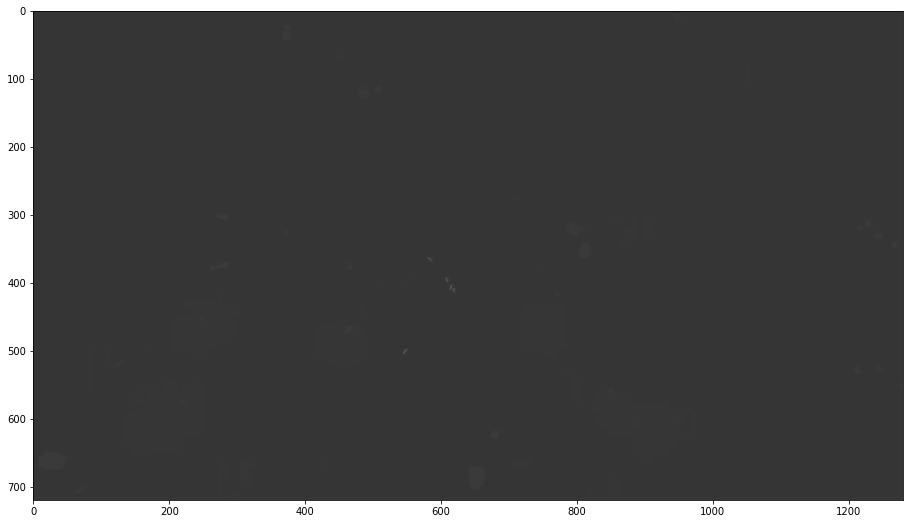

In [16]:
plt.figure(figsize=(16,9))
plt.imshow(frame)

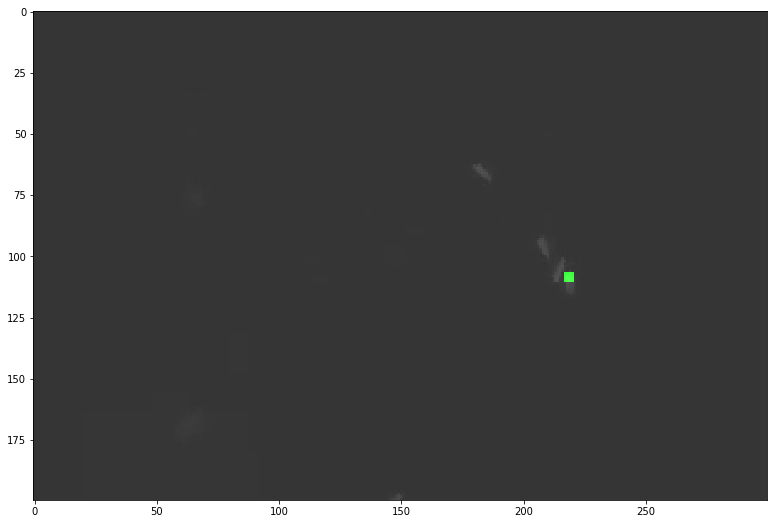

In [16]:
fr = frames[-1].copy()
x, y = interest_obj
x = int(x)
y = int(y)
fr[y-2:y+2, x-2:x+2,  1] = 255
plt.figure(figsize=(16,9))
plt.imshow(fr[300:500, 400:700,:], cmap='gray')

In [17]:
img_orig = frames[-1].copy()
img = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

In [18]:
ret, thresh = cv2.threshold(img, 70, 255, 0)
ret

70.0

In [22]:
im2, contours, hierarchy = cv2.findContours(thresh, cv2.CV_8UC1,2)
cnt = contours[1]
#M = cv2.moments(cnt)
print(M)

NameError: name 'M' is not defined

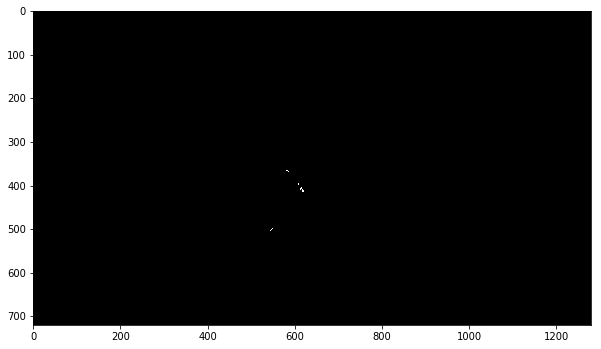

In [23]:
fig = plt.figure(figsize=(10,10))
plt.imshow(im2, cmap='gray')

In [18]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

NameError: name 'M' is not defined

In [24]:
area = cv2.contourArea(cnt)

In [25]:
perimeter = cv2.arcLength(cnt,True)

In [26]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [27]:
cv2.isContourConvex(cnt)

False

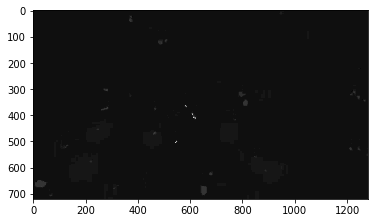

In [28]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

plt.imshow(img, cmap='gray')

In [29]:
box

array([[618, 413],
       [618, 407],
       [620, 407],
       [620, 413]])

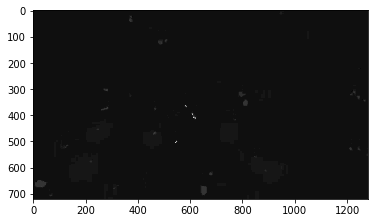

In [30]:
x,y,w,h = cv2.boundingRect(cnt)
plt.imshow(img, cmap='gray')

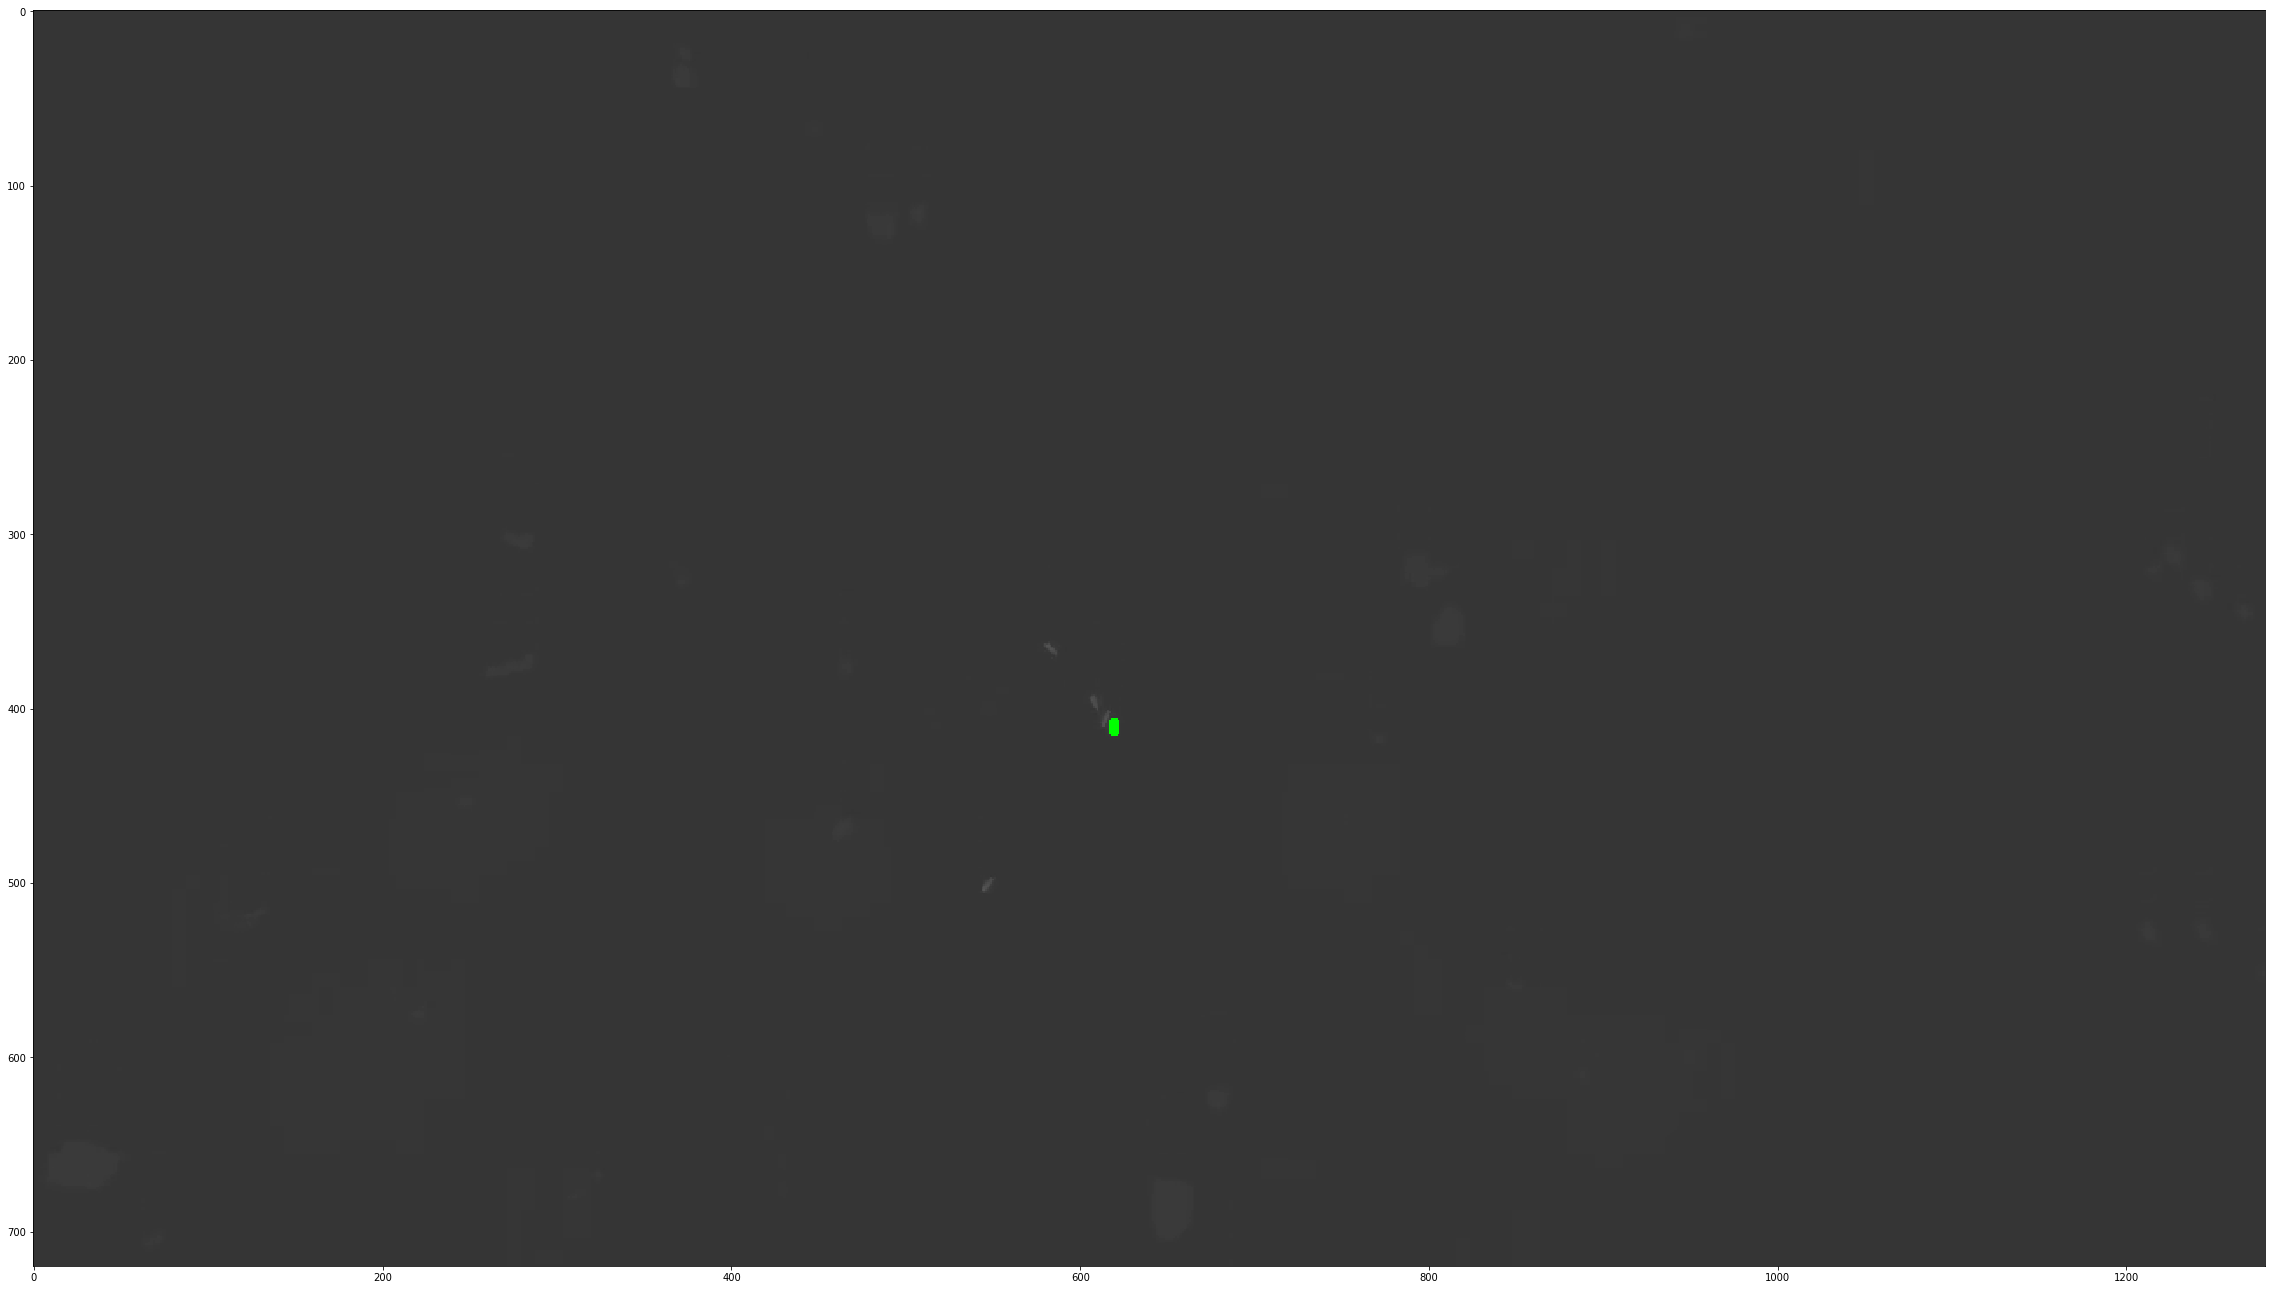

In [31]:
im = img_orig.copy()
fig = plt.figure(figsize=(40,40))
cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(im)

In [32]:
r = cv2.selectROI('windowname', img_orig)

error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1527005194613/work/modules/highgui/src/window.cpp:636: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


In [33]:
dist= cv2.pointPolygonTest(cnt, interest_obj, True)
dist

0.006365859999085435

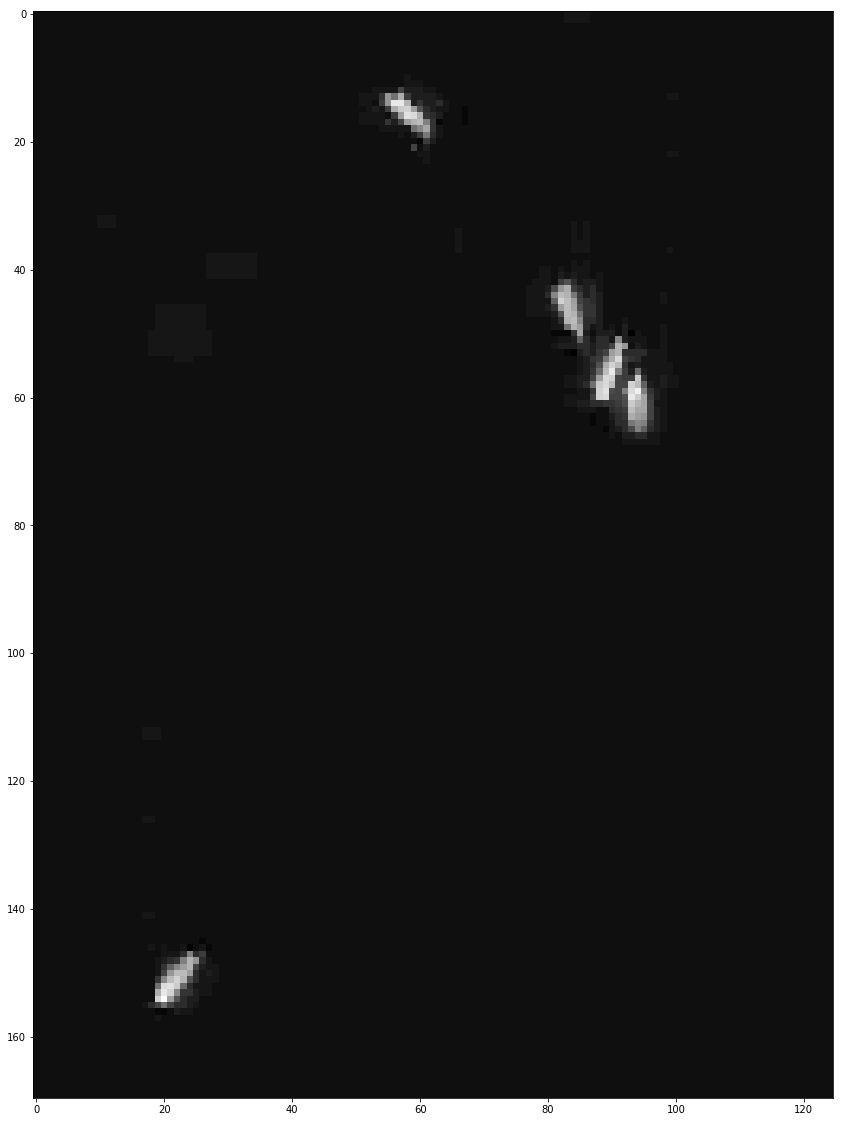

In [34]:
plt.figure(figsize=(20,20))
gg = gray.astype(np.float32)
gg = (gg - gg.min()) / (gg.max() - gg.min())

plt.imshow(gg[350:520,525:650], cmap='gray')

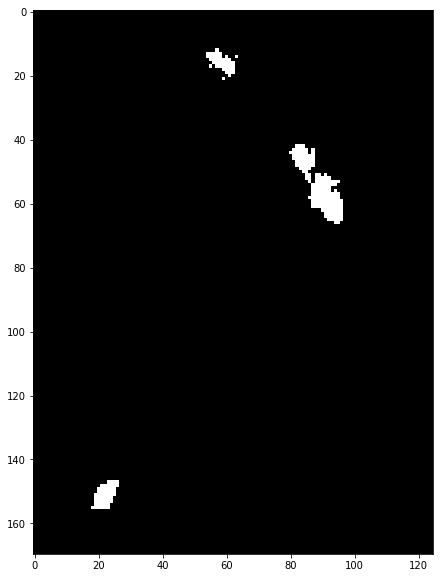

In [49]:
ret2, ff = cv2.threshold((gg*255).astype(np.uint8),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10,10))
plt.imshow(ff[350:520,525:650], cmap='gray')

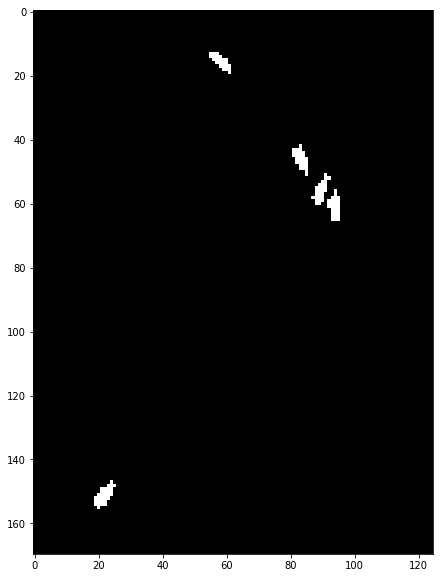

In [45]:
a, thresh = cv2.threshold(cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY), 
                       60, 60, cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))

plt.imshow(thresh[350:520,525:650], cmap='gray')

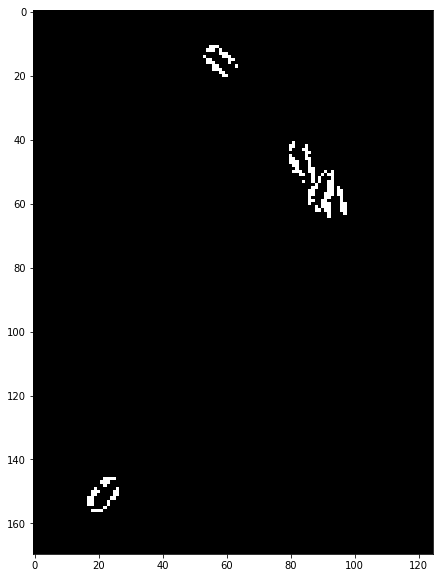

In [20]:
ada_thresh = cv2.adaptiveThreshold(cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY), 
                                   80,
                                   cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY_INV, 5, 3)
plt.figure(figsize=(10,10))
plt.imshow(ada_thresh[350:520,525:650], cmap='gray')

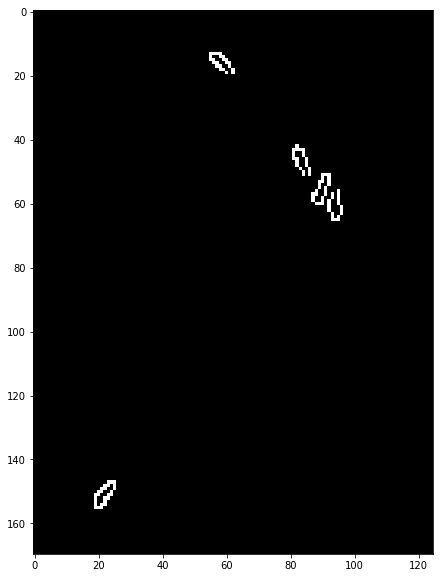

In [47]:
gg = cv2.Canny(cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY), 
          50,60)
plt.figure(figsize=(10,10))
plt.imshow(gg[350:520,525:650], cmap='gray')

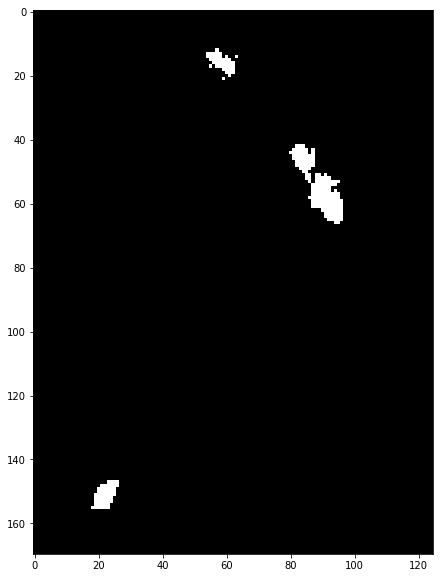

In [35]:
ret2, gg = cv2.threshold(cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10,10))
plt.imshow(gg[350:520,525:650], cmap='gray')

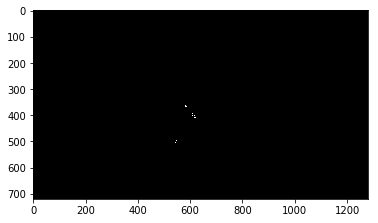

In [190]:
plt.imshow(gg, cmap='gray')

In [51]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
# dilated = cv2.dilate(gg, kernel)
# _, contours, _ = cv2.findContours(dilated.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


hh, contours, hier = cv2.findContours(gg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# conts = []
# for cnt in contours:
#     epsilon = -1 #0.01*cv2.arcLength(cnt,False)
#     approx = cv2.approxPolyDP(cnt,epsilon,False)
#     conts.append(approx)
# contours = conts
len(contours)

5

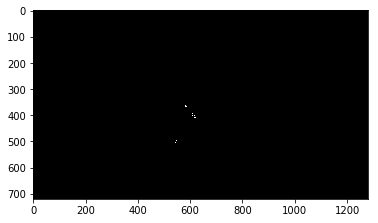

In [52]:
plt.imshow(hh, cmap='gray')

In [53]:
found_cnt = []
x, y = interest_obj
x = int(x)
y = int(y)
for cnt in contours:
    isincont = cv2.pointPolygonTest(cnt, (x,y), False) > 0
    if isincont:
        found_cnt.append(cnt)
len(found_cnt)

0

In [375]:
if -0.0:
    print('gaga')

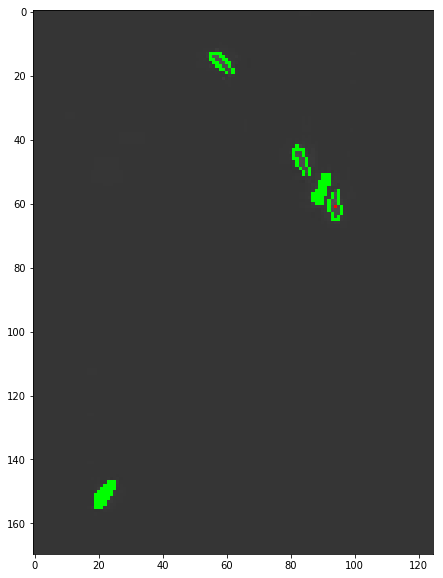

In [46]:
image = img_orig.copy()
x, y = interest_obj
x = int(x)
y = int(y)
cv2.drawContours(image, contours, -1, (0,255,0), cv2.FILLED)
#cv2.drawMarker(image, (x,y), (255,0,0))
image[y+2,x,:] = np.asarray((255,0,0))

plt.figure(figsize=(10,10))
plt.imshow(image[350:520,525:650])

In [40]:
cv2.pointPolygonTest(contours[1], (x,y), True)

-0.0

In [41]:
cv2.pointPolygonTest(found_cnt[1], (x,y), True)

IndexError: list index out of range

In [87]:
interest_objs =  df.iloc[194]['objects']
interest_objs, len(interest_objs)

([(619.094, 409.103),
  (614.834, 406.942),
  (607.849, 394.265),
  (581.376, 363.385),
  (545.011, 504.292)],
 5)

In [88]:
res = []
for (int_x,int_y) in interest_objs:
    for cnt in contours:
        if cv2.pointPolygonTest(cnt, (int_x,int_y), True) > 0:
            res.append(((int_x, int_y), cnt))
            break
len(res)

5

5

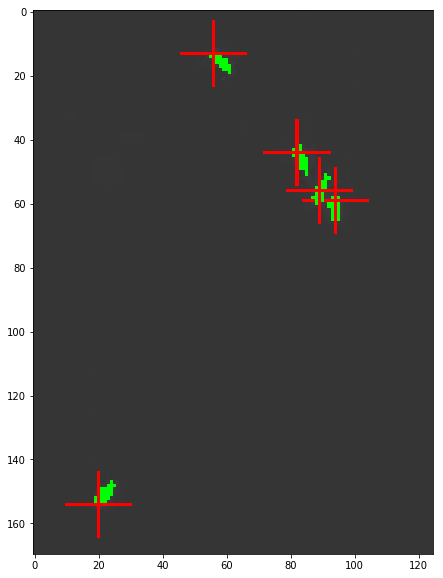

In [90]:
image = img_orig.copy()
for (x, y), cnt in res:
    x = int(x)
    y = int(y)
    cv2.drawContours(image, [cnt], -1, (0,255,0), cv2.FILLED)
    cv2.drawMarker(image, (x,y), (255,0,0))
    #image[y,x,:] = np.asarray((255,0,0))

plt.figure(figsize=(10,10))
plt.imshow(image[350:520,525:650])

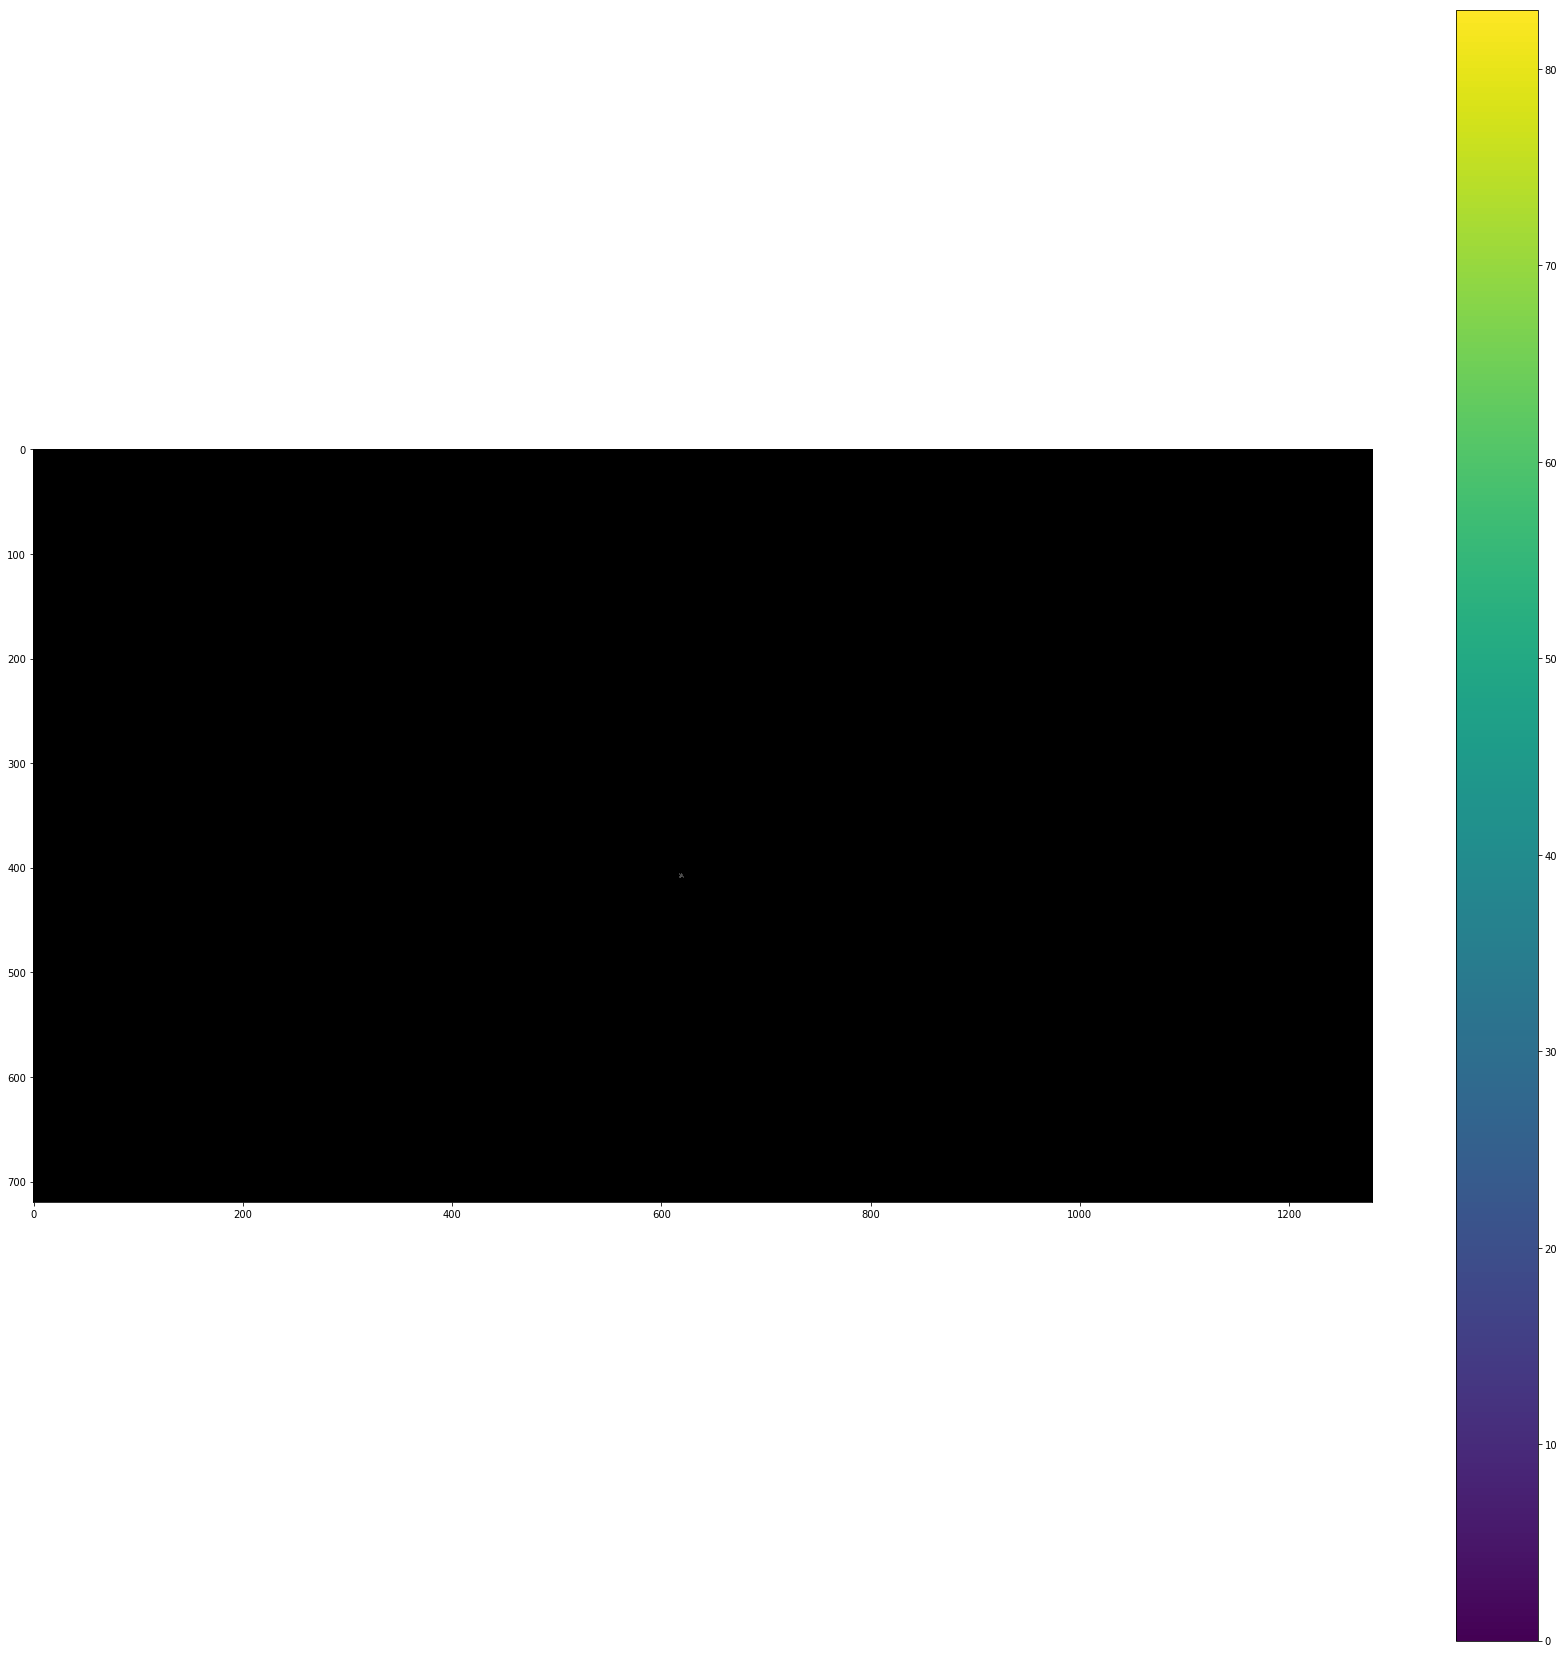

(<matplotlib.image.AxesImage at 0x7efd024538d0>,
 None)

In [63]:
mask = np.zeros(img_orig.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (617,406,5,5)
cv2.grabCut(img_orig,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
res = img_orig*mask2[:,:,np.newaxis]
plt.figure(figsize=(30,30))
plt.imshow(res),plt.colorbar(),plt.show()

In [74]:
mask = np.zeros(img_orig.shape[:2])
mask[618:620, 408:410] = 1
#ret, markers = cv2.connectedComponents(mask)
markers = mask
markers = markers+1
res = cv2.watershed(img_orig, markers)
plt.figure(figsize=(30,30))
plt.imshow(res)

error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1527005194613/work/modules/imgproc/src/segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function watershed


In [72]:
markers

NameError: name 'markers' is not defined